<a href="https://colab.research.google.com/github/bella0826/Network-programming-hw2-FTP-program-with-data-compression/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers  import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv3D, MaxPooling3D
#from tensorflow.keras.optimizers import SGD, RMSprop
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Model
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [70]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data() #train_data = 60000, test_data = 10000

#print(x_train_image.shape[0])

In [71]:
x_train_norm = x_train_image.reshape(60000,1,28,28).astype('float32')/255  #before entering model, need to flatten the data(from 60000*28*28 to 60000*784)
x_test_norm = x_test_image.reshape(10000,1,28,28).astype('float32')/255

#normalization
'''x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
'''
#one-hot-encoding
y_train = np_utils.to_categorical(y_train_label)
y_test = np_utils.to_categorical(y_test_label)

In [72]:
def build_model():
  model = Sequential()
  model.add(Conv2D(32,5,input_shape=(1,28,28),activation='linear',padding='same'))
  model.add(MaxPooling2D(2,data_format='channels_first'))
  model.add(BatchNormalization())

  model.add(Conv2D(64,5,activation='linear',padding='same'))
  model.add(MaxPooling2D(2,data_format='channels_first'))
  
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(258,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  
  print(model.summary())
  
  return model

In [73]:
def show_train_history(train_history,train,validation):

  if train == 'accuracy':
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history(acc)')
    plt.ylabel('train')
    plt.xlabel('epoch')
  else:
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history(loss)')
    plt.ylabel('train')
    plt.xlabel('epoch')
  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

In [74]:
def plot_images_labels(images,labels,prediction,idx,num=1):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=15
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        title="label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx=idx+1
    plt.show()

In [75]:
#training
model = build_model()

train_history = model.fit(x=x_train_norm,y=y_train,validation_split=0.2,batch_size=200,epochs=20,verbose=2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 1, 28, 32)         22432     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 1, 14, 16)        64        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 14, 64)         25664     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 7, 32)         0         
 g2D)                                                            
                                                      

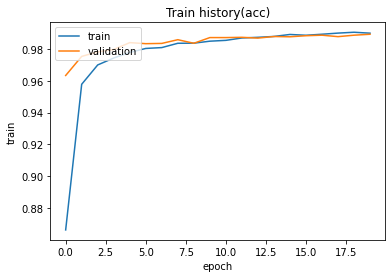

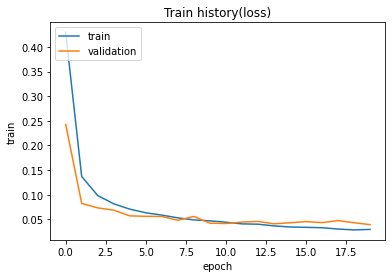

In [76]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [77]:
#testing
scores=model.evaluate(x_test_norm,y_test)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9902

accuracy 0.9901999831199646


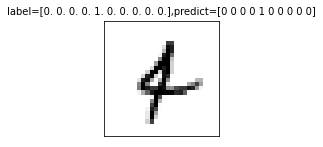

In [78]:
#print out the testing image
predictions = (model.predict(x_test_norm) > 0.5).astype('int32')
plot_images_labels(x_test_norm,y_test,predictions,idx=300)